In [49]:
import pickle
# Data processing
import numpy as np

# Image preprocessing tools
from PIL import Image

# Programming
from typing import Iterable

## Auxiliar Functions

In [37]:
def load_model(filename: str):
    """Loads a model that has been stored with pickle."""
    return pickle.load(open(filename, 'rb'))


def get_img_filepath(
    writer: str, 
    digit: int, 
    img_option: str, 
    folder: str='../../data', 
    extension: str="jpg",
) -> str:
    """Returns the canonical name of the corresponding file."""
    return f"{folder}/{img_option}/all_data/{writer}_{digit}.{extension}"


def get_set_of_imgs(writers: Iterable, digits: Iterable, img_options: Iterable) -> list:
    X_test, y_test = [], []
    for img_options in itertools.product(writers, digits, img_options):
        img_filepath = get_img_filepath(*img_options)

        X_test += [Image.open(img_filepath)]
        y_test += [img_options[1]]
        
    return np.array(X_test), np.array(y_test)


## Experimental Setup 

In [41]:
number_of_digits = range(0, 10)
img_options = ['no_flash', 'flash']

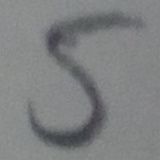

In [112]:
# Get the trained model
model = load_model("trained_mlp.sav")

# Get 
img = Image.open(get_img_filepath(1, 5, "no_flash"))
img

In [113]:
# resize image to 28x28 pixels
img = img.resize((28,28))
img

In [114]:
img = img.convert("L")
img

In [115]:
img = np.array(img)

In [116]:
img.shape

(28, 28)

In [117]:
# reshaping to support our model input and normalizing
img = img.reshape(1, 28*28)
img = img / 255

In [118]:
# predicting the class
res = model.predict([img])

In [120]:
np.argmax(res)

2

In [123]:
np.max(res)

0.31715882

AttributeError: 'numpy.ndarray' object has no attribute 'convert'